In [2]:
import json
f = open('data.json', 'r')
data = json.load(f)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_yr = {}
for player in data:
    for year in data[player]["data"]["SEASON_ID"]:
        year_str = data[player]["data"]["SEASON_ID"][year]
        if year_str not in data_yr:
            data_yr[year_str] = {}
        for stat in data[player]["data"]:
            if stat not in ["SEASON_ID", "LEAGUE_ID", "TEAM_ID", "TEAM_ABBREVIATION"]:
                if stat not in data_yr[year_str]:
                    data_yr[year_str][stat] = []
                data_yr[year_str][stat].append(data[player]["data"][stat][year])
data_yr['2020-21']['PTS'][:15]

[304, 438, 1197, 288, 64, 352, 508, 532, 134, 672, 806, 93, 9, 102, 854]

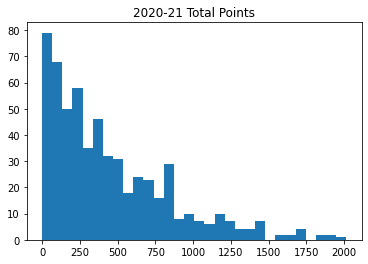

In [5]:
plt.title("2020-21 Total Points")
plt.hist(data_yr['2020-21']['PTS'], bins=30)
plt.show()

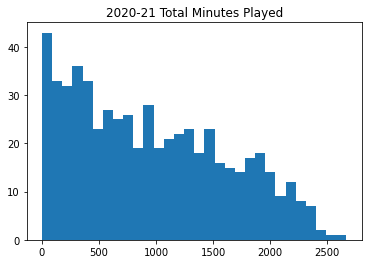

In [6]:
plt.title("2020-21 Total Minutes Played")
plt.hist(data_yr['2020-21']['MIN'], bins=30)
plt.show()

In [7]:
SCORING_TABLE = {}
SCORING_TABLE['FG3M'] = 2
SCORING_TABLE['FGM'] = 3
SCORING_TABLE['FTM'] = 1
SCORING_TABLE['FGMISS'] = -1
SCORING_TABLE['FTMISS'] = -1
SCORING_TABLE['REB'] = 1
SCORING_TABLE['AST'] = 2
SCORING_TABLE['STL'] = 4
SCORING_TABLE['BLK'] = 4
SCORING_TABLE['TOV'] = -2        

In [8]:
def player_fantasy_pts(player):
    ppy = {}
    for year in player['data']['SEASON_ID']:
        total = 0
        p = player['data']
        # 3-pointer made
        total += SCORING_TABLE['FG3M'] * p['FG3M'][year]
        # 2-pointer made
        total += SCORING_TABLE['FGM'] * p['FGM'][year]
        # Free throw made
        total += SCORING_TABLE['FTM'] * p['FTM'][year]
        # Field goal missed
        total += SCORING_TABLE['FGMISS'] * (p['FGA'][year] - p['FGM'][year])
        # Free throw missed
        total += SCORING_TABLE['FTMISS'] * (p['FTA'][year] - p['FTM'][year])
        # Rebound
        total += SCORING_TABLE['REB'] * p['REB'][year]
        # Assist
        total += SCORING_TABLE['AST'] * p['AST'][year]
        # Steal
        total += SCORING_TABLE['STL'] * p['STL'][year]
        # Block
        total += SCORING_TABLE['BLK'] * p['BLK'][year]
        # Turnover
        total += SCORING_TABLE['TOV'] * p['TOV'][year]
        
        ppy[player['data']['SEASON_ID'][year]] = total
        
    return ppy

# Stephen Curry
player_fantasy_pts(data["201939"])

{'2009-10': 2953,
 '2010-11': 2680,
 '2011-12': 845,
 '2012-13': 3357,
 '2013-14': 3661,
 '2014-15': 3919,
 '2015-16': 4448,
 '2016-17': 3752,
 '2017-18': 2453,
 '2018-19': 3310,
 '2019-20': 188,
 '2020-21': 3255,
 '2021-22': 858}

In [9]:
fantasy_ppy = {}
for player in data:
    fantasy_ppy[player] = player_fantasy_pts(data[player])
# Stephen Curry
fantasy_ppy["201939"]

{'2009-10': 2953,
 '2010-11': 2680,
 '2011-12': 845,
 '2012-13': 3357,
 '2013-14': 3661,
 '2014-15': 3919,
 '2015-16': 4448,
 '2016-17': 3752,
 '2017-18': 2453,
 '2018-19': 3310,
 '2019-20': 188,
 '2020-21': 3255,
 '2021-22': 858}

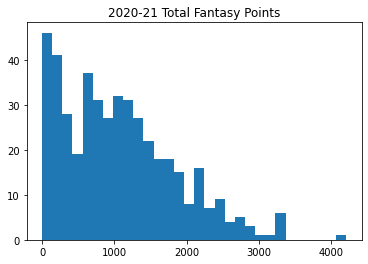

In [10]:
plt.title("2020-21 Total Fantasy Points")
year = '2020-21'
x = [fantasy_ppy[player][year] for player in fantasy_ppy if year in fantasy_ppy[player]]
plt.hist(x, bins=30)
plt.show()

In [11]:
f"mean: {np.mean(x)}"

'mean: 1065.2980132450332'

In [12]:
f"stdev: {np.std(x)}"

'stdev: 776.9247050266976'

In [13]:
POINTS_TO_WIN = 35_000
SALARY = 200
NUM_PLAYERS = 13

In [14]:
POINTS_PER_DOLLAR = POINTS_TO_WIN / SALARY
f'POINTS PER DOLLAR SPENT: {POINTS_PER_DOLLAR}'

'POINTS PER DOLLAR SPENT: 175.0'

In [15]:
COST_PER_POINT = SALARY / POINTS_TO_WIN
f'COST PER POINT: ${COST_PER_POINT}'

'COST PER POINT: $0.005714285714285714'

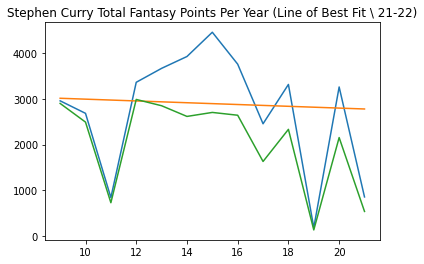

In [16]:
plt.title("Stephen Curry Total Fantasy Points Per Year (Line of Best Fit \ 21-22)")
x = [k.split("-")[0][-2:] for k in fantasy_ppy['201939']]
xi = np.array([int(z) for z in x])
y = np.array(list(fantasy_ppy['201939'].values()))
plt.plot(xi, y)
m, b = np.polyfit(xi[:-1], y[:-1], 1)
plt.plot(xi, xi * m + b)
y2 = np.array(list(data['201939']['data']['MIN'].values()))
plt.plot(xi, y2)
plt.show()

In [17]:
def get_roster(values, weights, W, K):
    dp = []
    pl = []
    for i in range(len(values)):
        dp.append([])
        pl.append([])
        for j in range(W+1):
            dp[i].append([])
            pl[i].append([])
            for k in range(K+1):
                dp[i][j].append(0)
                pl[i][j].append([])
    for i in range(1, len(values)):
        for j in range(1, W+1):
            for k in range(1, K+1):
                if (j >= weights[i-1]):
                    if dp[i-1][j][k] > dp[i-1][j-weights[i-1]][k-1] + values[i-1]:
                        dp[i][j][k] = dp[i-1][j][k]
                        pl[i][j][k] += pl[i-1][j][k]
                    else:
                        dp[i][j][k] = dp[i-1][j-weights[i-1]][k-1] + values[i-1]
                        pl[i][j][k] += pl[i-1][j-weights[i-1]][k-1] + [i-1]
                else:
                    dp[i][j][k] = dp[i-1][j][k]
                    pl[i][j][k] += pl[i-1][j][k]
    return dp[len(values)-1][W][K], pl[len(values)-1][-1][-1]

In [18]:
prop_costs = {}
# round((fantasy_ppy[player][train_year] / POINTS_TO_WIN) * SALARY
for player in fantasy_ppy:
    if "2020-21" in fantasy_ppy[player]:
        prop_costs[player] = round((fantasy_ppy[player]["2020-21"] / POINTS_TO_WIN) * SALARY)

In [19]:
points = []
cost = []
players = []
train_year = "2020-21"
test_year = "2021-22"

def get_name(player):
    return data[player]['first_name'] + " " + data[player]['last_name']

for player in fantasy_ppy:
    if train_year in fantasy_ppy[player]:
        players.append(player)
        points.append(fantasy_ppy[player][train_year])
        cost.append(prop_costs[player])
assert len(points) == len(cost) == len(players)
get_name(players[0]), points[0], cost[0]

('Precious Achiuwa', 642, 4)

In [20]:
total_points, roster = get_roster(points, cost, SALARY, NUM_PLAYERS)
print(f"Roster for {test_year} based on {train_year} data")
for p in roster:
    print(f'{points[p]}pts, ${cost[p]}, {get_name(players[p])}')
print(f"Total Points: {total_points}")

Roster for 2021-22 based on 2020-21 data
2341pts, $13, Deandre Ayton
2537pts, $14, Clint Capela
3337pts, $19, Luka Doncic
2361pts, $13, Tobias Harris
2695pts, $15, Kyrie Irving
4215pts, $24, Nikola Jokic
2180pts, $12, Michael Porter Jr.
2870pts, $16, Domantas Sabonis
2179pts, $12, Pascal Siakam
2338pts, $13, Jonas Valanciunas
3339pts, $19, Russell Westbrook
2671pts, $15, Zion Williamson
2701pts, $15, Trae Young
Total Points: 35764


In [21]:
print(f"Actual points for {test_year} for above roster")
total = 0
for p in roster:
    if test_year in fantasy_ppy[players[p]]:
        total += fantasy_ppy[players[p]][test_year]
        print(f"{fantasy_ppy[players[p]][test_year]}, ${cost[p]}, {get_name(players[p])}")
print(f"Total Points: {total}")

Actual points for 2021-22 for above roster
406, $13, Deandre Ayton
583, $14, Clint Capela
655, $19, Luka Doncic
407, $13, Tobias Harris
818, $24, Nikola Jokic
183, $12, Michael Porter Jr.
724, $16, Domantas Sabonis
238, $12, Pascal Siakam
747, $13, Jonas Valanciunas
753, $19, Russell Westbrook
764, $15, Trae Young
Total Points: 6278


In [22]:
# Using ESPN cost values (2021-22 season)
import csv
espn_costs = {}

def name_to_player(name):
    name = name.strip().replace(".", "").replace("-","").replace(" ", "")
    for player in data:
        name2 = data[player]["first_name"] + data[player]["last_name"]
        name2 = name2.strip().replace(".", "").replace("-","").replace(" ", "")
        if name == name2:
            return player
    print(name)
    return -1

with open('espn_cost.csv', 'r') as file:
    reader = csv.reader(file)
    reader = list(reader)
    for row in reader:
        player = row[1]
        cost = row[-1][1:]
        if not cost:
            cost = 0
        cost = float(cost)
        player = name_to_player(player)
        espn_costs[player] = cost

for player in fantasy_ppy:
    if "2020-21" in fantasy_ppy[player]:
        if player not in espn_costs:
            espn_costs[player] = 0
# Stephen Curry
espn_costs["201939"]

64.8

In [23]:
cost = []
players = []
points = []
margin = 0.95
minimum = 5
exclude = ["Kawhi Leonard", "Kyrie Irving"]
exclude = [name_to_player(e) for e in exclude if name_to_player(e) != -1]
train_year = "2020-21"
test_year = "2021-22"
for player in fantasy_ppy:
    if train_year in fantasy_ppy[player] and player not in exclude:
        players.append(player)
        points.append(fantasy_ppy[player][train_year])
        cost.append(max(round(espn_costs[player] * margin), minimum))
assert len(points) == len(cost) == len(players)

In [24]:
total_points, roster = get_roster(points, cost, SALARY, NUM_PLAYERS)
print(f"Roster for {test_year} based on {train_year} data")
for p in roster:
    print(f'{points[p]}pts, ${cost[p]}, {get_name(players[p])}')
print(f"Total Points: {total_points}\n")

print(f"Actual points for {test_year} (so far) for above roster")
total = 0
for p in roster:
    if test_year in fantasy_ppy[players[p]]:
        total += fantasy_ppy[players[p]][test_year]
        print(f"{fantasy_ppy[players[p]][test_year]}pts ({fantasy_ppy[players[p]][test_year] * 4}), ${cost[p]}, {get_name(players[p])}")
print(f"Total Points: {total}, {total * 4}")

Roster for 2021-22 based on 2020-21 data
2154pts, $5, Kyle Anderson
2195pts, $5, Mikal Bridges
2236pts, $10, Draymond Green
2216pts, $6, Buddy Hield
4215pts, $69, Nikola Jokic
2156pts, $5, T.J. McConnell
2145pts, $5, Kelly Olynyk
2954pts, $20, Chris Paul
3098pts, $32, Julius Randle
2562pts, $8, Terry Rozier
2338pts, $5, Jonas Valanciunas
3339pts, $25, Russell Westbrook
2321pts, $5, Andrew Wiggins
Total Points: 33929

Actual points for 2021-22 (so far) for above roster
375pts (1500), $5, Kyle Anderson
475pts (1900), $5, Mikal Bridges
533pts (2132), $10, Draymond Green
485pts (1940), $6, Buddy Hield
818pts (3272), $69, Nikola Jokic
495pts (1980), $5, T.J. McConnell
270pts (1080), $5, Kelly Olynyk
750pts (3000), $20, Chris Paul
678pts (2712), $32, Julius Randle
378pts (1512), $8, Terry Rozier
747pts (2988), $5, Jonas Valanciunas
753pts (3012), $25, Russell Westbrook
493pts (1972), $5, Andrew Wiggins
Total Points: 7250, 29000


In [25]:
# Determine the standouts
differences = []
s = 0.8
for player in espn_costs:
    if player in prop_costs:
        x = (espn_costs[player] / SALARY) * 100
        y = (prop_costs[player] / SALARY) * 100
        x, y = round(x, 1), round(y, 1)
        differences.append((fantasy_ppy[player]["2020-21"] > s * (POINTS_TO_WIN / NUM_PLAYERS), get_name(player), f"{x}%", f"{y}%", x - y))
differences = sorted(differences, key=lambda x: x[-1])
for y, p, a, b, c in differences[:]:
    print(y, round(c, 1), p, a, b)

False -6.0 Enes Kanter 0.0% 6.0%
False -6.0 Thaddeus Young 0.0% 6.0%
True -5.9 Kawhi Leonard 1.1% 7.0%
True -5.8 Kyle Anderson 0.2% 6.0%
True -5.6 T.J. McConnell 0.4% 6.0%
False -5.5 Kelly Olynyk 0.5% 6.0%
False -5.5 Coby White 0.0% 5.5%
False -5.2 Jamal Murray 0.3% 5.5%
False -5.0 Jae'Sean Tate 0.0% 5.0%
False -5.0 Delon Wright 0.0% 5.0%
False -4.9 Dillon Brooks 0.1% 5.0%
False -4.9 Danny Green 0.1% 5.0%
False -4.9 Kevin Huerter 0.1% 5.0%
True -4.8 Mikal Bridges 1.7% 6.5%
False -4.8 Ricky Rubio 0.2% 5.0%
False -4.8 Mason Plumlee 0.2% 5.0%
False -4.8 Joe Ingles 0.7% 5.5%
False -4.7 Duncan Robinson 0.3% 5.0%
False -4.6 Jordan Clarkson 0.9% 5.5%
False -4.5 Nicolas Batum 0.0% 4.5%
False -4.5 Royce O'Neale 0.0% 4.5%
False -4.5 Robert Covington 1.0% 5.5%
False -4.5 Jalen Brunson 0.0% 4.5%
False -4.5 Justin Holiday 0.0% 4.5%
False -4.5 Brandon Clarke 0.0% 4.5%
False -4.5 Kendrick Nunn 0.0% 4.5%
False -4.5 Naz Reid 0.0% 4.5%
False -4.5 Daniel Theis 0.0% 4.5%
False -4.4 Nerlens Noel 0.1% 4.5%


False -0.5 Trent Forrest 0.0% 0.5%
False -0.5 Wenyen Gabriel 0.0% 0.5%
False -0.5 Anthony Gill 0.0% 0.5%
False -0.5 Josh Green 0.0% 0.5%
False -0.5 Kyle Guy 0.0% 0.5%
False -0.5 Shaquille Harrison 0.0% 0.5%
False -0.5 Markus Howard 0.0% 0.5%
False -0.5 Chandler Hutchison 0.0% 0.5%
False -0.5 Wes Iwundu 0.0% 0.5%
False -0.5 Alize Johnson 0.0% 0.5%
False -0.5 Tre Jones 0.0% 0.5%
False -0.5 Mfiondu Kabengele 0.0% 0.5%
False -0.5 Louis King 0.0% 0.5%
False -0.5 Nathan Knight 0.0% 0.5%
False -0.5 Anthony Lamb 0.0% 0.5%
False -0.5 Romeo Langford 0.0% 0.5%
False -0.5 Trey Lyles 0.0% 0.5%
False -0.5 Rodney McGruder 0.0% 0.5%
False -0.5 Sam Merrill 0.0% 0.5%
False -0.5 Juwan Morgan 0.0% 0.5%
False -0.5 Frank Ntilikina 0.0% 0.5%
False -0.5 Jahlil Okafor 0.0% 0.5%
False -0.5 KZ Okpala 0.0% 0.5%
False -0.5 Cameron Oliver 0.0% 0.5%
False -0.5 Daniel Oturu 0.0% 0.5%
False -0.5 Jabari Parker 0.0% 0.5%
False -0.5 Reggie Perry 0.0% 0.5%
False -0.5 Paul Reed 0.0% 0.5%
False -0.5 Luka Samanic 0.0% 0.5%
F